# Annotating Circos Plot Node Labels

This example set was contributed by Alireza Hosseini.

/Users/uqztuong/Library/CloudStorage/OneDrive-TheUniversityofQueensland/Documents/GitHub/nxviz/nxviz/__init__.py:19: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


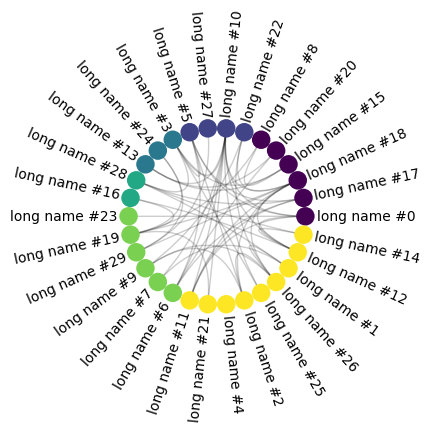

In [1]:
from random import randint

import matplotlib.pyplot as plt
import networkx as nx

import nxviz as nv
from nxviz import annotate

G = nx.erdos_renyi_graph(n=30, p=0.1)
for n, d in G.nodes(data=True):
    G.nodes[n]["group"] = randint(0, 5)
G = nx.relabel_nodes(G, {i: "long name #" + str(i) for i in range(len(G))})

nv.circos(G, group_by="group", node_color_by="group")
annotate.circos_labels(G, group_by="group", layout="rotate")
# The rotated labels take up more space, so we will have to increase the
# padding a bit. 5% on all sides works well here.
plt.tight_layout(rect=(0.05, 0.05, 0.95, 0.95))
plt.show()


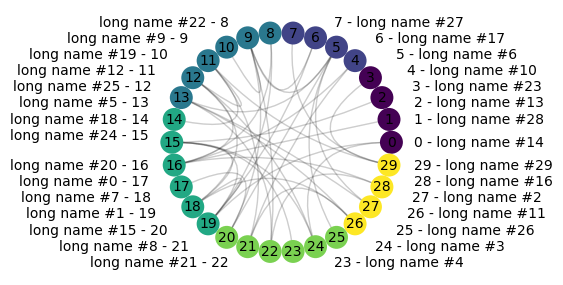

In [2]:
G = nx.erdos_renyi_graph(n=30, p=0.1)
for n, d in G.nodes(data=True):
    G.nodes[n]["group"] = randint(0, 5)
G = nx.relabel_nodes(G, {i: "long name #" + str(i) for i in range(len(G))})

nv.circos(G, group_by="group", node_color_by="group")
annotate.circos_labels(G, group_by="group", layout="numbers")
# The numbered labels take up more space, so we will have to increase the
# padding a bit. 15% on all sides works well here.
plt.tight_layout(rect=(0.15, 0.15, 0.85, 0.85))
plt.show()


# Custom color mapping circos nodes and edges

This example shows how to customize the color mapping of nodes and edges in a Circos plot.

The example is contributed by Kelvin Tuong.

In [3]:
from itertools import cycle
# 14 categories
categories = [
    "sun",
    "moon",
    "stars",
    "cloud",
    "wheel",
    "box",
    "plant",
    "chair",
    "slippers",
    "tablet",
    "laptop",
    "dishwasher",
    "bicycle",
    "piano",
    "laptop",
]

# 20 colors - providing an uneven list on purpose
palette = [
    "#1f77b4",
    "#ff7f0e",
    "#279e68",
    "#d62728",
    "#aa40fc",
    "#8c564b",
    "#e377c2",
    "#b5bd61",
    "#17becf",
    "#aec7e8",
    "#ffbb78",
    "#98df8a",
    "#ff9896",
    "#c5b0d5",
    "#c49c94",
    "#f7b6d2",
    "#dbdb8d",
    "#9edae5",
    "#ad494a",
    "#8c6d31",
]

categorical = cycle(categories[0:4]) # max 4 distinct categories
categories[0:4]
# ['sun', 'moon', 'stars', 'cloud']
many_categorical = cycle(categories) # up to 14

n = 71
p = 0.01
G = nx.erdos_renyi_graph(n=n, p=p)

legend_kwargs = {
        "ncol": 1,
        "bbox_to_anchor": (1, 0.5),
        "frameon": False,
        "loc": "center left",
    }

for n in G.nodes():
    G.nodes[n]["group1"] = next(categorical)
    G.nodes[n]["group2"] = next(many_categorical) # up to 14
for u, v in G.edges():
    G.edges[u, v]["edge_group1"] = next(categorical)
    G.edges[u, v]["edge_group2"] = next(many_categorical) # up to 14
    G.edges[u, v]["thickness"] = 3  # just to be able see the edge colours later

Current default behavior

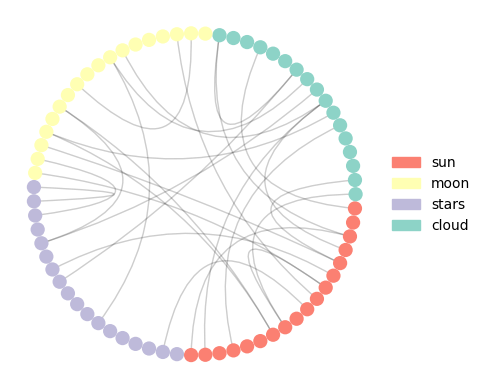

In [4]:
nv.circos(G, group_by="group1", node_color_by="group1")
annotate.node_colormapping(G, color_by="group1", legend_kwargs=legend_kwargs)

Now we can manusally specify the node colors:

<Axes: >

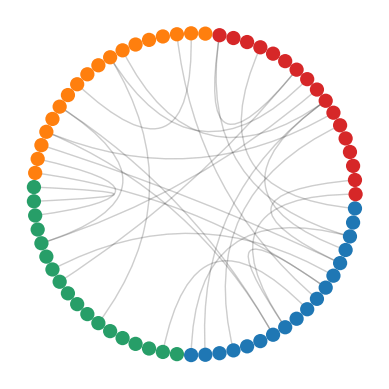

In [5]:
nv.circos(G, group_by="group1", node_color_by="group1", node_palette=palette[:4]) # specify 4 colors for 4 groups


now with more than 12 categories (14), and a long color palette (20 colors)

<Axes: >

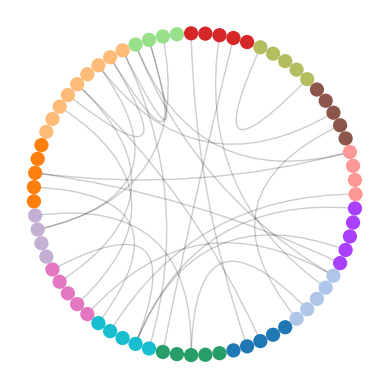

In [6]:
nv.circos(G, group_by="group2", node_color_by="group2", node_palette=palette)


same as above but limit to 7 colors - colors start to cycle if palette is provided as a list.

<Axes: >

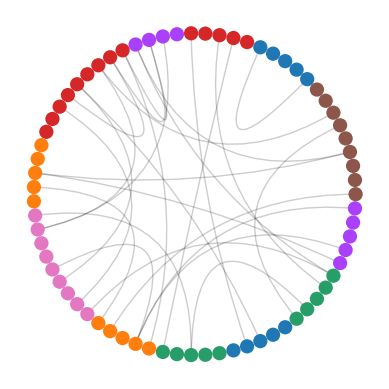

In [7]:
nv.circos(G, group_by="group2", node_color_by="group2", node_palette=palette[:7])


palette provides as a dictionary

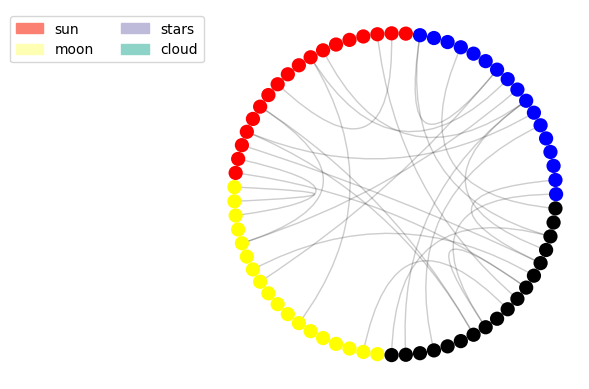

In [8]:
pal = {'moon':'red', 'stars':'yellow', 'sun':'black', 'cloud':'blue'}
nv.circos(G, group_by="group1", node_color_by="group1", node_palette=pal)
annotate.node_colormapping(G, color_by="group1", palette=pal)

order of keys don't matter

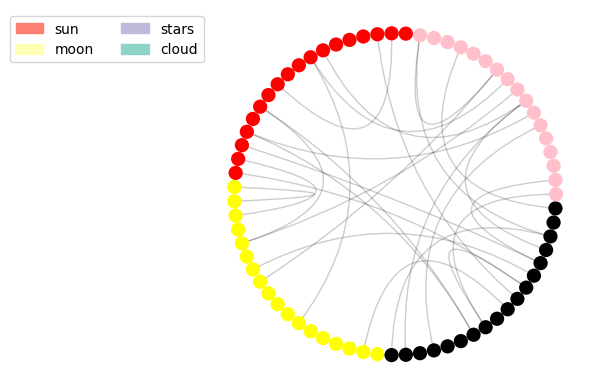

In [9]:
pal = {'moon':'red', 'cloud':'pink', 'stars':'yellow', 'sun':'black'}
nv.circos(G, group_by="group1", node_color_by="group1", node_palette=pal)
annotate.node_colormapping(G, color_by="group1", palette=pal)

can mix colors/hex codes

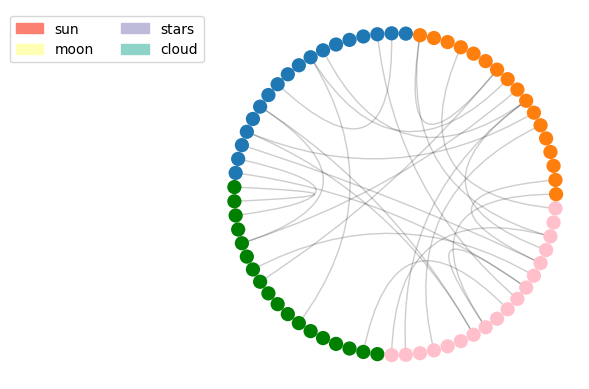

In [10]:
pal = ['pink', '#1f77B4', 'green', '#ff7f0e']
nv.circos(G, group_by="group1", node_color_by="group1", node_palette=pal)
annotate.node_colormapping(G, color_by="group1", palette=pal)

swapping of order of colors in a list matters. But the plot should reflect this correctly - if you look up at the dictionary examples, the same order is preserved.

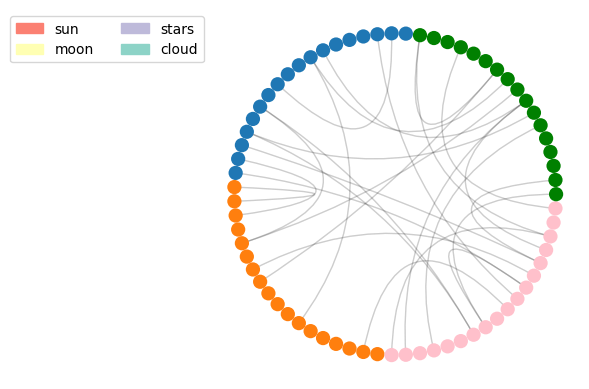

In [11]:
pal = ['pink', '#1f77B4', '#ff7f0e', 'green'] # swapped the order of the last two colours
nv.circos(G, group_by="group1", node_color_by="group1", node_palette=pal)
annotate.node_colormapping(G, color_by="group1", palette=pal)

Can be used on edges as well:

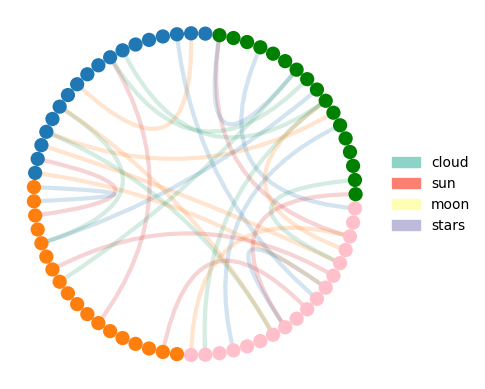

In [23]:
node_pal = ['pink', '#1f77B4', '#ff7f0e', 'green'] # swapped the order of the last two colours

ax = nv.circos(G, 
          group_by="group1", 
          node_color_by = "group1", 
          edge_color_by = 'edge_group1', 
          node_palette = node_pal, 
          edge_palette = palette,
          edge_lw_by = 'thickness',
         )
annotate.edge_colormapping(G, color_by="edge_group1", palette=palette, legend_kwargs=legend_kwargs, ax = ax)